<a href="https://colab.research.google.com/github/HighCWu/anime_biggan_toy/blob/main/colab/Play_Anime_BigGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References

Models converted from Shawwn's training [1] and Gwern's release [2]. 2D character picture (HatsuneMiku) is licensed under CC BY-NC by piapro [3].

- [1] Shawwn, The model is trained based on his fork of google's 'compare_gan', https://github.com/shawwn/compare_gan/
- [2] Gwern, "A prototype anime BigGAN 256px trained on Danbooru2019+e621 for 600k iterations is now available for download", https://www.gwern.net/Faces#danbooru2019e621-256px-biggan
- [3] "For Creators", http://piapro.net/en_for_creators.html

## 开始 Begin

记得给我点星星啦！ [我的仓库](https://www.github.com/HighCWu/anime_biggan_toy)

If you like my repo, star it. [My repo](https://www.github.com/HighCWu/anime_biggan_toy)

这个Notebook仅作展示用，我的仓库里有更多相关内容。

This notebook is for display purposes only, there are more related content in my repo.

欢迎来我的Q群玩耍：1044867291

In [1]:
 !git clone https://www.github.com/HighCWu/anime_biggan_toy

Cloning into 'anime_biggan_toy'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 78 (delta 37), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [2]:
!pip install paddlepaddle-gpu==1.8.4.post107

     |████████████████████████████████| 406.1MB 44kB/s 


In [3]:
%cd anime_biggan_toy

/content/anime_biggan_toy


In [4]:
import os 
 
!mkdir data -p
 
def get_model_checkpoint(output_dir, model_ID, model_choice, overwrite=False):
    output_path = os.path.join(output_dir, f'{model_choice.lower()}.pdparams')
    if overwrite is True:
        print('Overwriting file, if it exists.')
        !rm -v $output_path
    else:
        if os.path.exists(output_path):
            print('File already exists at', '\n->', output_path)
            return output_path
    print('Downloading model to', '\n->', output_path)
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$model_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$model_ID" -O $output_path && rm -rf /tmp/cookies.txt
 
    return output_path
 
get_model_checkpoint('data', '1V9emQcBOz1ujrlGGDxYFsdavWbUxG1ws', 'anime-biggan-256px-run39-607250.generator')

-> data/anime-biggan-256px-run39-607250.generator.pdparams
data/anime-biggan-2     [              <=>   ] 470.57M  88.5MB/s    in 5.0s    


'data/anime-biggan-256px-run39-607250.generator.pdparams'

In [5]:
# 加载模型 Load Model
from networks import model_cache, load_G, load_D
from networks import std_gen, std_gen_interpolate
from networks import std_enc, std_enc_with_D
load_G('data/anime-biggan-256px-run39-607250.generator')

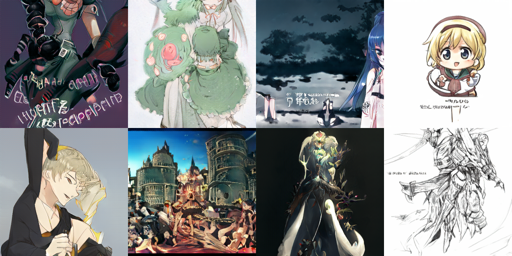

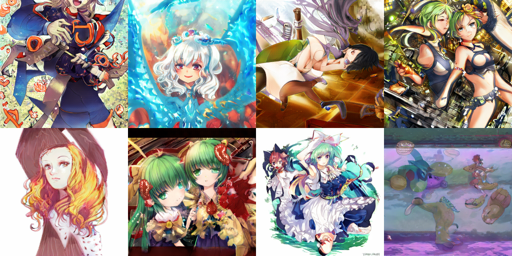

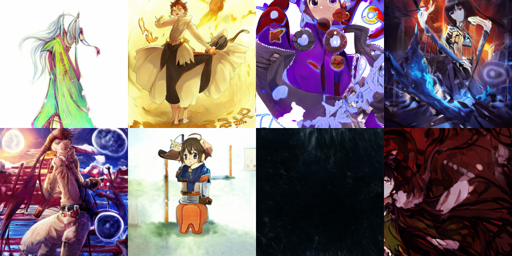

In [6]:
# 运行模型的标准生成输出过程 Run Output Process of Model's Standard Generation 
import numpy as np
from PIL import Image
from IPython.display import display
 
def concat_imgs_bsz8(imgs):
    np_imgs = [np.asarray(img) for img in imgs]
    img1 = np.concatenate(np_imgs[:4], 1)
    img2 = np.concatenate(np_imgs[4:], 1)
    img = Image.fromarray(np.concatenate([img1, img2], 0))
    return img.resize([img.size[0]//2, img.size[1]//2])
 
imgs = std_gen(8, seed=233)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))
 
imgs = std_gen(8, seed=None)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i+8).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))
 
imgs = std_gen(8, seed=234) # 不同的seed不同的结果 Different seed with different result
for i, img in enumerate(imgs):
    img.save(f'data/std_seed234_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

In [ ]:
# 运行模型的标准生成动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML
std_gen_interpolate(8, seed=233, out_path='data/std_out1.gif')
std_gen_interpolate(8, seed=None, out_path='data/std_out2.gif')
std_gen_interpolate(8, seed=234, out_path='data/std_out3.gif') # 不同的seed不同的结果 Different seed with different result
# Colab似乎不支持以下的动图显示方式，请直接到文件浏览器中查看 
# Colab does not seem to support the following animation display methods, please go directly to the file browser to view
# display(HTML('<img src="data/std_out1.gif">'))
# display(HTML('<img src="data/std_out2.gif">'))
# display(HTML('<img src="data/std_out3.gif">'))

In [ ]:
# 运行模型的标准生成分层插值动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML
std_gen_interpolate(8, seed=2333, out_path='data/std_inter1.gif', levels="z11;z12")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter2.gif', levels="z21;z22")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter3.gif', levels="z31;z32")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter4.gif', levels="z41;z42")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter5.gif', levels="z51;z52")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter6.gif', levels="z61;z62")
# Colab似乎不支持以下的动图显示方式，请直接到文件浏览器中查看 
# Colab does not seem to support the following animation display methods, please go directly to the file browser to view
# display(HTML('<img src="data/std_inter1.gif">'))
# display(HTML('<img src="data/std_inter2.gif">'))
# display(HTML('<img src="data/std_inter3.gif">'))
# display(HTML('<img src="data/std_inter4.gif">'))
# display(HTML('<img src="data/std_inter5.gif">'))
# display(HTML('<img src="data/std_inter6.gif">'))

## 尝试编码已存在的图像 Try to encode image
BigGAN没有StyleGAN那么丰富的输入，所以这种尝试的结果是失败。
BigGAN does not have as rich input as StyleGAN, so this attempt failed.

loss: 0.08729273825883865  2/2000
loss: 0.04128742963075638  2000/20000


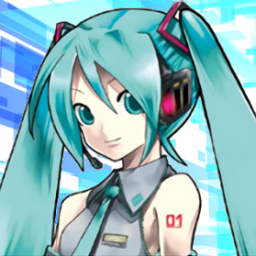

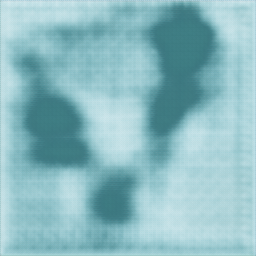

In [ ]:
from IPython.display import display

dec, img = std_enc(path='miku.png', steps=2000, lr=4e-3)
display(img)
display(dec)

我没有在Google Drive上分享判别器转换后的预训练模型，因为我的空间不够了。
 
I did not share the converted pre-trained model of the discriminator on Google Drive because I did not have enough space. 

In [ ]:
load_D('data/anime-biggan-256px-run39-607250.discriminator')

loss: 204.1401824951172  2/2000
loss: 88.60155487060547  2000/2000


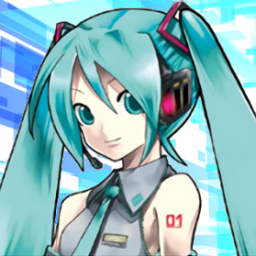

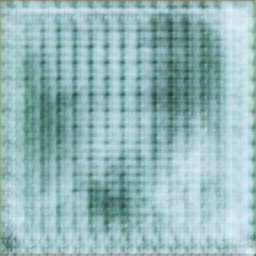

In [ ]:
from IPython.display import display

dec, img = std_enc_with_D(path='miku.png', steps=2000, lr=1e-3, levels=[1,2], weights=[100,1])
display(img)
display(dec)